<a href="https://colab.research.google.com/github/aceballosGitHub/eda_couse/blob/main/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar el archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(ruta_archivo)

In [39]:
# Paso 2: Análisis Exploratorio
# Puedes imprimir información básica sobre el conjunto de datos
print("Información del conjunto de datos:")
print(data.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [40]:
data = data.dropna()

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [42]:
# Visualizar las primeras filas del conjunto de datos
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y
5,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urbano,Y


In [43]:
# Ejercicio: Predecir si un préstamo será aprobado o no utilizando otras variables del conjunto de datos

#Para el ejercicio reviso los datos categóricos
unique_values = data.apply(lambda col: col.unique())
print(unique_values)

ID                         [LP001003, LP001005, LP001006, LP001008, LP001...
Genero                                                    [Hombre, FeHombre]
Married                                                             [Si, No]
dependientes                                                   [1, 0, 2, 3+]
 educacion                                          [Graduado, Not Graduado]
 autoempleado                                                       [No, Si]
 ingresos_solicitante      [4583, 3000, 2583, 6000, 5417, 2333, 3036, 400...
 ingresos_cosolicitante    [1508.0, 0.0, 2358.0, 4196.0, 1516.0, 2504.0, ...
 monto_prestamo            [128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0...
 plazo_prestamo            [360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240....
 historial_crediticio                                             [1.0, 0.0]
 area_propiedad                                  [Rural, Urbano, SemiUrbano]
 estado_prestamo                                                      [N, Y]

In [44]:
#Codifico las columnas categóricas a numéricas con cat.codes antes de revisar el pairplot o boxplot. LA gráficas deberían ayudarme a tomar la decisión sobre las columnas que afectan mas al estado del prestamo
columnas_a_codificar = ['Genero', 'Married', 'dependientes', ' educacion', ' autoempleado', ' area_propiedad', ' estado_prestamo']
data[columnas_a_codificar] = data[columnas_a_codificar].apply(lambda col: col.astype('category').cat.codes)

In [45]:
#Reviso como quedaron 5 primeras filas (ahora codificadas con números)
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [46]:
#Reviso como quedaron las variables (ahora codificadas con números)
unique_values = data.apply(lambda col: col.unique())
print(unique_values)

ID                         [LP001003, LP001005, LP001006, LP001008, LP001...
Genero                                                                [1, 0]
Married                                                               [1, 0]
dependientes                                                    [1, 0, 2, 3]
 educacion                                                            [0, 1]
 autoempleado                                                         [0, 1]
 ingresos_solicitante      [4583, 3000, 2583, 6000, 5417, 2333, 3036, 400...
 ingresos_cosolicitante    [1508.0, 0.0, 2358.0, 4196.0, 1516.0, 2504.0, ...
 monto_prestamo            [128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0...
 plazo_prestamo            [360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240....
 historial_crediticio                                             [1.0, 0.0]
 area_propiedad                                                    [0, 2, 1]
 estado_prestamo                                                      [0, 1]

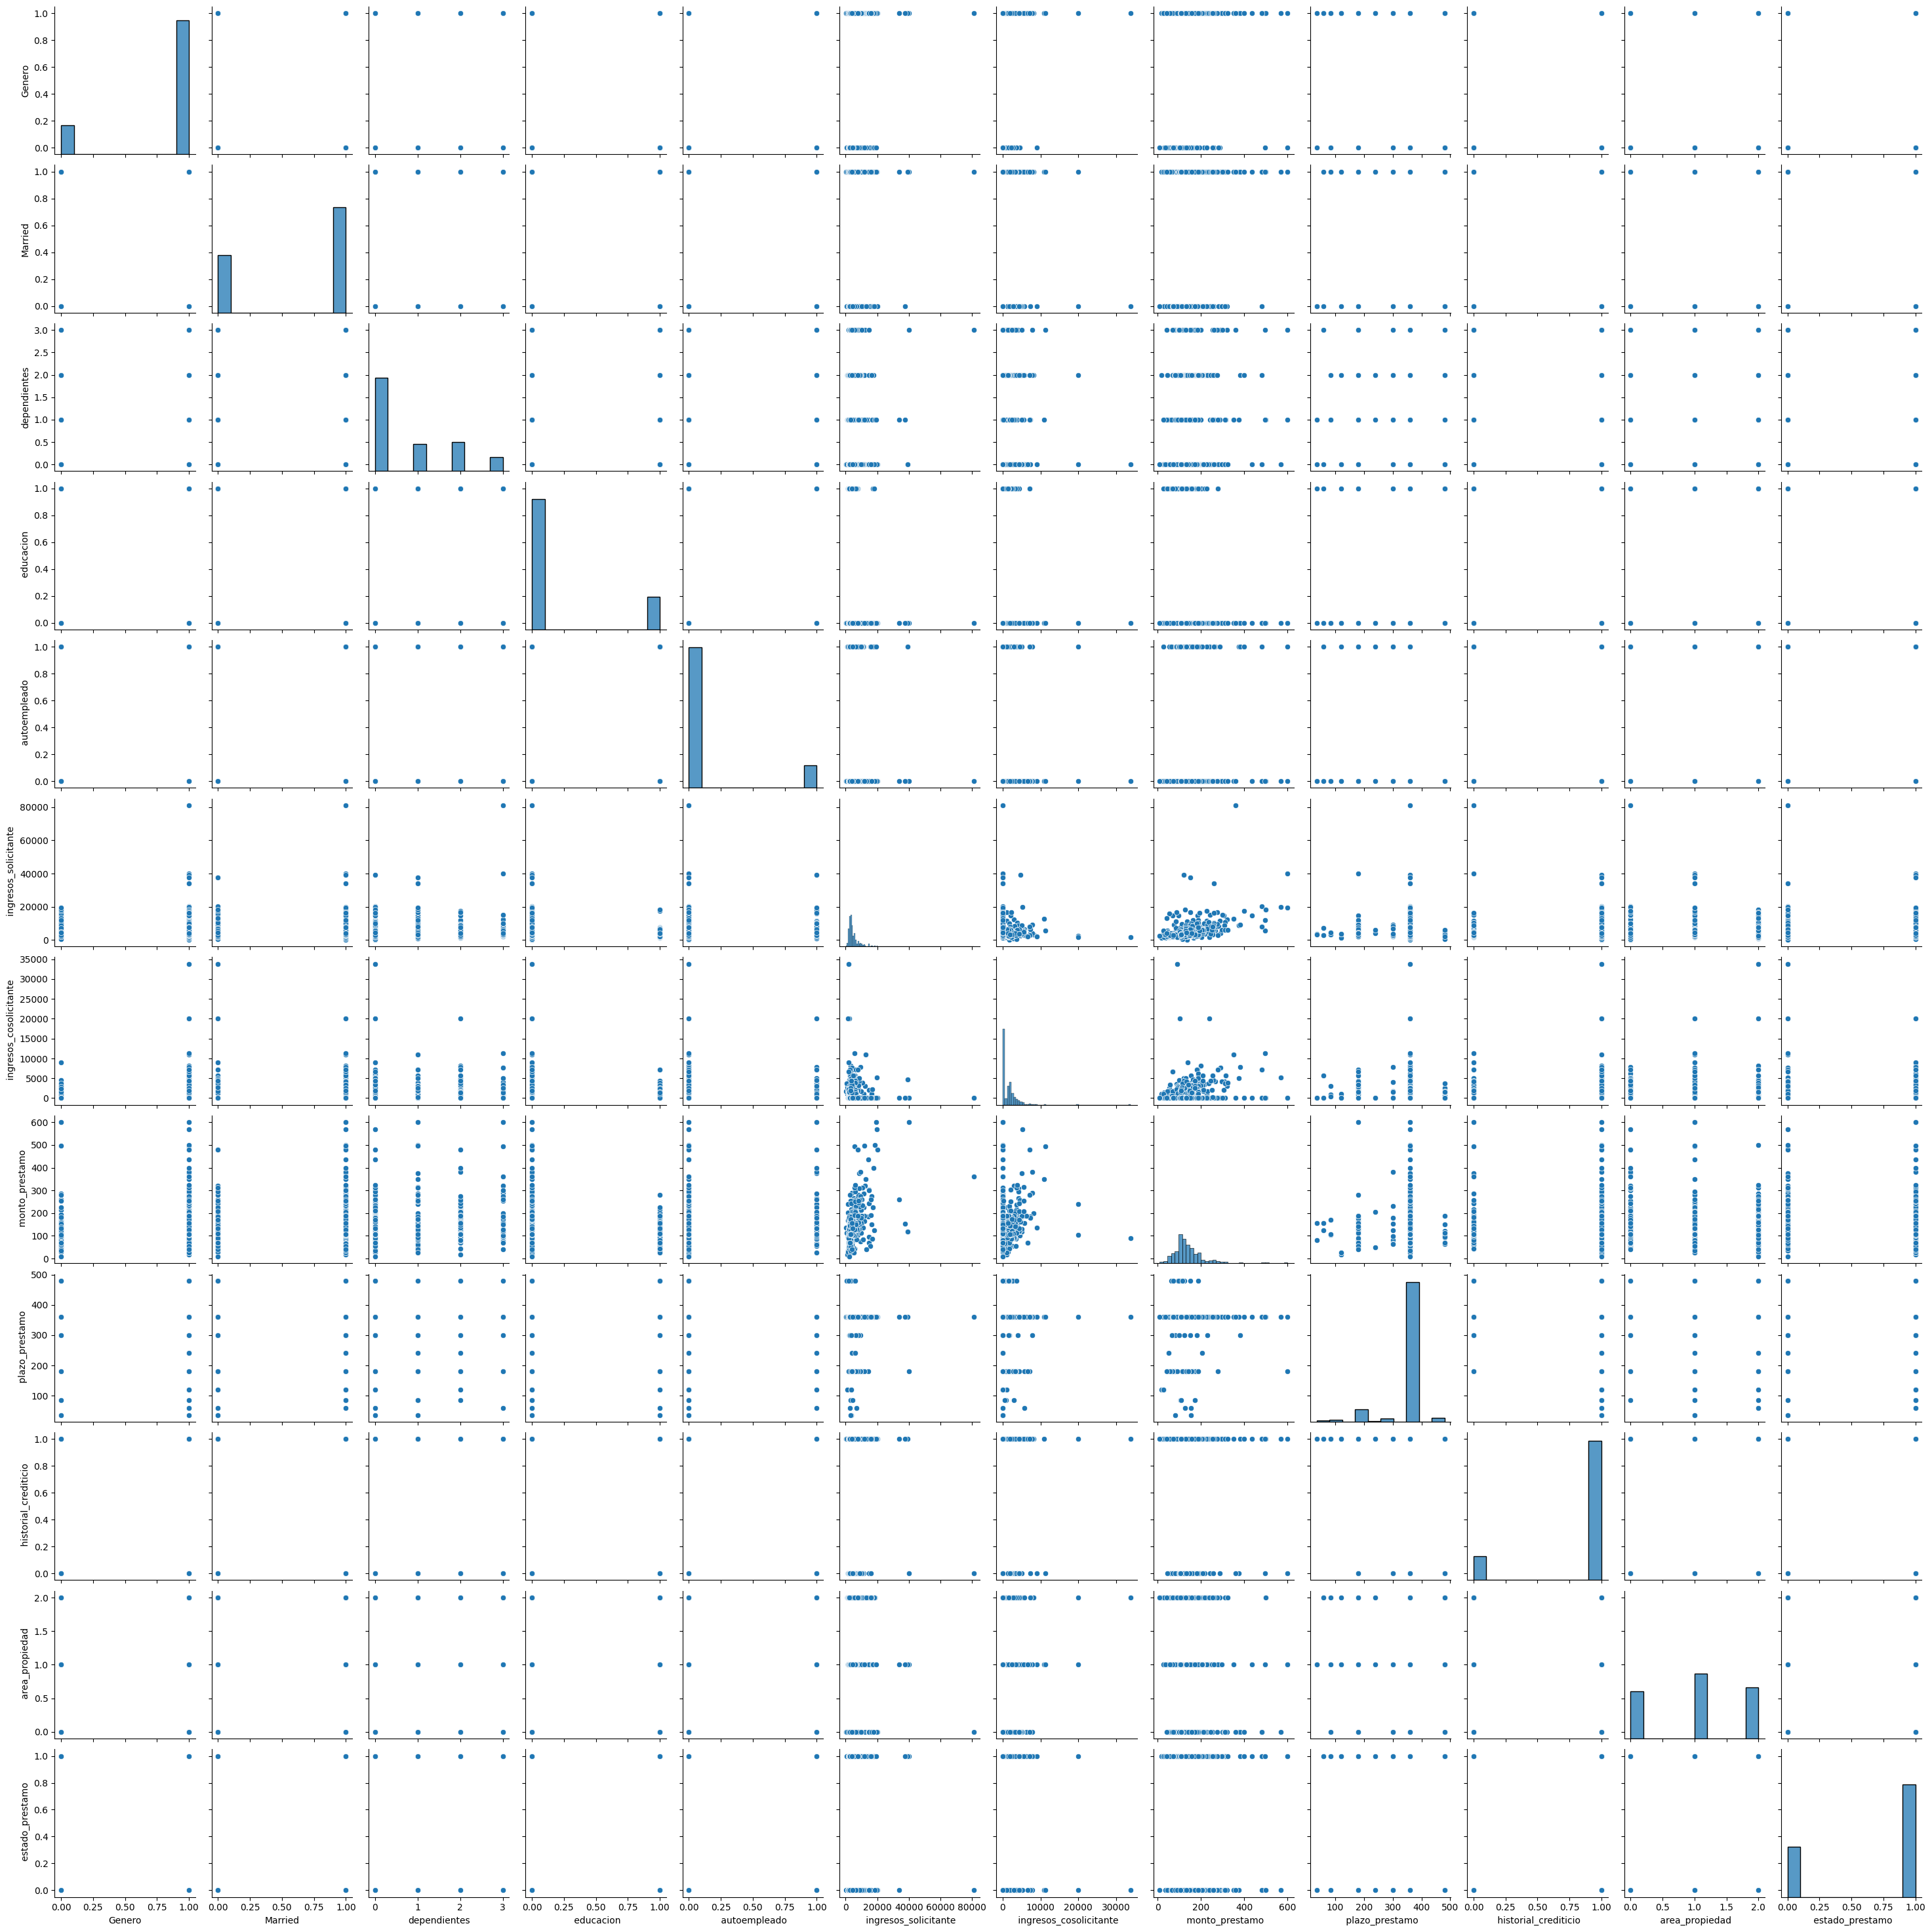

In [10]:
#Realizo la gráfica de pairplot para ver si hay correlaciones que me permitan ver las variables que mas afectan
sns.pairplot(data)

<Axes: >

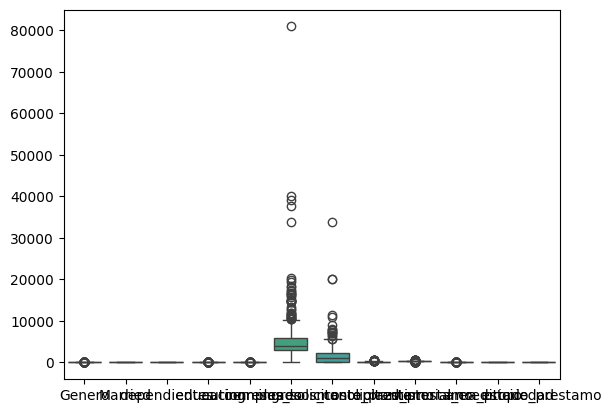

In [47]:
#reviso también la gráfica boxplot
sns.boxplot(data)

In [49]:
# Ingreso las columnas historial_crediticio, autoempleado, plazo_prestamo y quito monto prestamo

# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " historial_crediticio", " autoempleado", " plazo_prestamo"]]
y = data[' estado_prestamo']

In [50]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    historial_crediticio    480 non-null    float64
 3    autoempleado            480 non-null    int8   
 4    plazo_prestamo          480 non-null    float64
dtypes: float64(3), int64(1), int8(1)
memory usage: 19.2 KB
None


In [51]:
data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

In [52]:
valores_unicos = data[' historial_crediticio'].unique()
print(valores_unicos)

[1. 0.]


In [53]:
data['dependientes'] = data['dependientes'].replace({"0": 0, "1": 1, "2": 2, "3+": 3})
data['dependientes'] = data['dependientes'].astype(int)

In [54]:
# Visualizar las primeras filas del conjunto de datos
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [55]:
valores_unicos = data['dependientes'].unique()
print(valores_unicos)

[1 0 2 3]


In [56]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.80


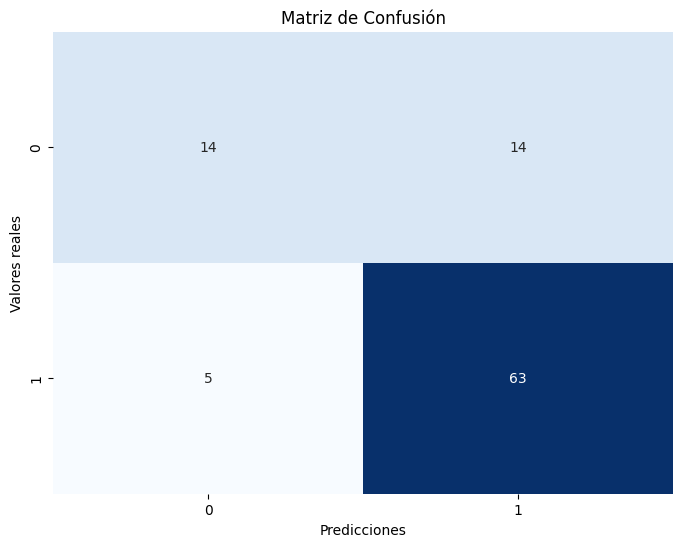


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.82      0.93      0.87        68

    accuracy                           0.80        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.80      0.79        96



In [57]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [ ]:
# Paso 6: Guardar el modelo entrenado
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Paso 7: Cargar el modelo entrenado
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)
